<a href="https://colab.research.google.com/github/ddenisenko/test/blob/master/seminar1_numpy_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Краткий туториал по NumPy

Данное руководство ни в коем случае не предентует на полноту изложения

[NumPy](https://docs.scipy.org/doc/numpy/user/index.html)

[Quickstart guide](https://docs.scipy.org/doc/numpy/user/quickstart.html)

Библеотека NumPy предоставляет следующие **возможности**: 
* работать с многомерными массивами (включая матрицы)
* производить быстрое вычисление математических функций на многомерных массивах

Ядром пакета NumPy является объект [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

**Важные отличия** между NumPy arrays и Python sequences: 
* NumPy array имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически)
* Элементы в NumPy array должны быть одного типа
* Можно выполнять операции непосредственно над NumPy arrays

**Сильные стороны** NumPy: 
* Vectorization 
* Broadcasting

**Мотивирующий пример**
![Imgur](https://i.imgur.com/z4GzOX6.png)

In [0]:
import numpy as np

### Способы создания Numpy arrays
* Конвертация из Python structures
* Генерация с помощью встроенных функций
* Чтение с диска

### Конвертация из Python structures

In [0]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

При конвертации можно задавать тип данных с помощью аргумента [dtype](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html): 

In [0]:
np.array([1, 2, 3, 4, 5], dtype=np.float32)

array([1., 2., 3., 4., 5.], dtype=float32)

Аналогичное преобразование:

In [0]:
np.float32([1, 2, 3, 4, 5])

array([1., 2., 3., 4., 5.], dtype=float32)

**Но**: элементы NumPy array должны быть одного типа

In [0]:
a = [1, 'a', 1.2, []]
np.array(a)

ValueError: setting an array element with a sequence

In [0]:
np.array(a, dtype=object)

array([1, 'a', 1.2, list([])], dtype=object)

### Генерация Numpy arrays

* [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) — аналог range из Python, которому можно передать нецелочисленный шаг
* [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) — способ равномерно разбить отрезок на n-1 интервал
* [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html) — способ разбить отрезок по логарифмической шкале
* [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) — создаёт массив заполненный нулями заданной размерности
* [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) — создаёт массив заполненный единицами заданной размерности
* [empty](https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html) — создаёт массив неинициализированный никаким значением заданной размерности

In [0]:
np.arange(0, 5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [0]:
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [0]:
np.logspace(0, 9, 10, base=2)

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

In [0]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [0]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

In [0]:
np.empty((2, 2))

array([[1., 1.],
       [1., 1.]])

Pазмеры массива хранятся в поле **shape**, а количество размерностей - в **ndim**

In [0]:
array = np.ones((2, 3))
print('Размерность массива - {}, количество размерностей - {}'.format(array.shape, array.ndim))

Размерность массива - (2, 3), количество размерностей - 2


Метод [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) позволяет преобразовать размеры массива без изменения исходных данных

`reshape` возвращает новое view массива, если возможно. Если нет, то возвращается копия

In [0]:
array = np.arange(0, 6, 0.5)
array = array.reshape((2, 6))
array

array([[0. , 0.5, 1. , 1.5, 2. , 2.5],
       [3. , 3.5, 4. , 4.5, 5. , 5.5]])

Если хочется, чтобы возникала ошибка при копировании, стоит присваивать новое значение атрибута `shape`, а не пользоваться функцией `reshape`

In [0]:
a = np.zeros((10, 2))
# A transpose makes the array non-contiguous
b = a.T
# Taking a view makes it possible to modify the shape without modifying
# the initial object.
c = b.view()
c.shape = (20)

AttributeError: incompatible shape for a non-contiguous array

Для того что бы развернуть многомерный массив в вектор, можно воспользоваться функцией [ravel](ravel)

In [0]:
array = np.ravel(array)
array

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

### Индексация

В NumPy работает привычная индексация Python, включая использование отрицательных индексов и срезов

In [0]:
print(array[0])
print(array[-1])
print(array[1:-1])
print(array[1:-1:2])
print(array[::-1])

0.0
5.5
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[0.5 1.5 2.5 3.5 4.5]
[5.5 5.  4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0. ]


**Замечание 1** Срезы в numpy возвращают view, а не копию массива

**Замечание 2**: Индексы и срезы в многомерных массивах не нужно разделять квадратными скобками 

т.е. вместо ```matrix[i][j]``` нужно использовать ```matrix[i, j]```

В качестве индексов можно использовать массивы:

In [0]:
array[[0, 2, 4, 6, 8, 10]]

array([0., 1., 2., 3., 4., 5.])

In [0]:
array[[True, False, True, False, True, False, True, False, True, False, True, False]]

array([0., 1., 2., 3., 4., 5.])

`:` - полный срез по оси

In [0]:
x = np.array([[[1, 2, 3], [4, 5, 6]]])
x[:, :, 0]

array([[1, 4]])

Если количество индексов меньше количества осей, то пропущенные индексы считаются равными `:`

In [0]:
x[0]

array([[1, 2, 3],
       [4, 5, 6]])

`...` (**dots**) - удобный синтаксис, когда нужно использовать несколько `:` для задания полного индекса

Например, пусть `x` - `np.array` с 5 осями. Тогда

```
x[1, 2, ...] - то же самое, что x[1, 2, :, :, :],
x[..., 3] эквивалетно x[:, :, :, :, 3]
x[4, ..., 5, :] эквивалентно x[4, :, :, 5, :]
```

In [0]:
x[..., 0]

array([[1, 4]])

`np.newaxis` и `None`

In [0]:
x = np.array([10, 20])
print(x, x.shape)
print(x[np.newaxis], x[np.newaxis].shape, x[None].shape)
print(x[np.newaxis, :], x[np.newaxis, :].shape)
print(x[:, np.newaxis], x[:, np.newaxis].shape)

[10 20] (2,)
[[10 20]] (1, 2) (1, 2)
[[10 20]] (1, 2)
[[10]
 [20]] (2, 1)


### Операции

Операции в NumPy можно производить непосредственно над векторами одинаковой размерности без использования циклов

In [0]:
a = np.array([0, 2, 4, 6, 8, 10])
b = np.array([10, 12, 14, 16, 18, 110])

In [0]:
print(a - b)
print(a + b)
print(a * b)
print(a - b)

[ -10  -10  -10  -10  -10 -100]
[ 10  14  18  22  26 120]
[   0   24   56   96  144 1100]
[ -10  -10  -10  -10  -10 -100]


Аналогично для многомерных массивов

Также в NumPy есть разнообразные математические операции

In [0]:
print(np.sin(10))
print(np.sqrt(100))
print(np.exp(2))

-0.5440211108893698
10.0
7.38905609893065


**Замечание:** Все арифметические операции над массивами одинаковой размерности производятся поэлементно

### [Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

Broadcasting снимает правило одной размерности и позволяет производить арифметические операции над массивами разных, но согласованных размерностей. Например, умножение вектора на число:

![Imgur](https://i.imgur.com/tE3ZCWG.gif)

In [0]:
2 * np.arange(1, 4)

array([2, 4, 6])

Правило согласования размерностей выражается в одном предложении: 

```Two dimensions are compatible when they are equal, or one of them is 1```

Если количество размерностей не совпадают, то к массиву меньшей размерности добавляются фиктивные размерности "слева", например:
```
a = np.ones((2,3,4))
b = np.ones(4)
c = a * b            # here a.shape == (2, 3, 4) and b.shape is considered to be (1, 1, 4)
```

Прибавим к каждой строчки матрицы один и тот же вектор:

![Imgur](https://i.imgur.com/VsP2dqT.gif)

In [0]:
np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]]) + np.arange(3)

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Теперь если мы хотим, проделать тот же трюк но со столбцами, то мы не можем просто добавить вектор состоящий из 4 элементов т.к. в данном случае размеры будут не согласованы

![Imgur](https://i.imgur.com/9LvGoeL.gif)

Сначала нужно преоброзовать вектор к виду:

In [0]:
np.arange(4)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3]])

А затем к нему добавить матрицу:

In [0]:
np.arange(4)[:, np.newaxis] + np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])

array([[ 0,  0,  0],
       [11, 11, 11],
       [22, 22, 22],
       [33, 33, 33]])

Если нужно перемножить многомерные массивы не поэлеметно, а по правилу перемножения матриц, то следует воспользоваться [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)

Транспонирование производится с помощью `ndarray.T` (пример: `a.T`) или [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.transpose.html)

Так же в NumPy реализованно много полезных операций для работы с массивами:
[np.min](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html),
[np.max](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html),
[np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html),
[np.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) и т.д.

**Замечание:** В каждой из перечисленных функций есть параметр **axis**, который указывает по какому измерению производить данную операцию. По умолчанию операция производится по всем значениям массива

Например,

In [0]:
a = [[1, 2, 3],
    [20, 40, 60],
    [300, 600, 900]
]


print('Среднее всех значений: {}'.format(np.mean(a)))
print('Среднее значение по строкам: {}'.format(np.mean(a, axis=0)))
print('Среднее значение по столбцам: {}'.format(np.mean(a, axis=1)))

Среднее всех значений: 214.0
Среднее значение по строкам: [107. 214. 321.]
Среднее значение по столбцам: [  2.  40. 600.]


### Конкатенация многомерных массивов

Конкатенировать несколько массивом можно с помощью функций [**np.concatenate, np.hstack, np.vstack**](https://stackoverflow.com/questions/33356442/when-should-i-use-hstack-vstack-vs-append-vs-concatenate-vs-column-stack)

In [0]:
a = [[1, 2, 3],
    [20, 40, 60],
    [300, 600, 900]]

b = [[-1, -2, -3],
    [-20, -40, -60],
    [-300, -600, -900]]

In [0]:
np.hstack([a, b])

array([[   1,    2,    3,   -1,   -2,   -3],
       [  20,   40,   60,  -20,  -40,  -60],
       [ 300,  600,  900, -300, -600, -900]])

In [0]:
np.vstack([a, b])

array([[   1,    2,    3],
       [  20,   40,   60],
       [ 300,  600,  900],
       [  -1,   -2,   -3],
       [ -20,  -40,  -60],
       [-300, -600, -900]])

## [Matplotlib](https://matplotlib.org/)

In [0]:
import matplotlib.pylab as plt

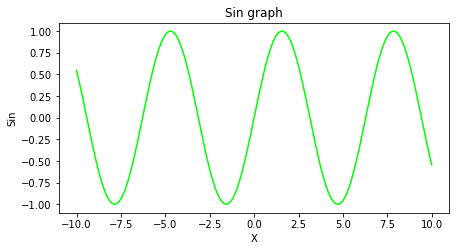

In [0]:
X = np.sin(np.linspace(-10, 10, 2001))

plt.figure(figsize=(7, 3.5))
plt.title('Sin graph')
plt.plot(np.linspace(-10, 10, 2001), X, color='lime')
plt.xlabel('X')
plt.ylabel('Sin')
plt.show()

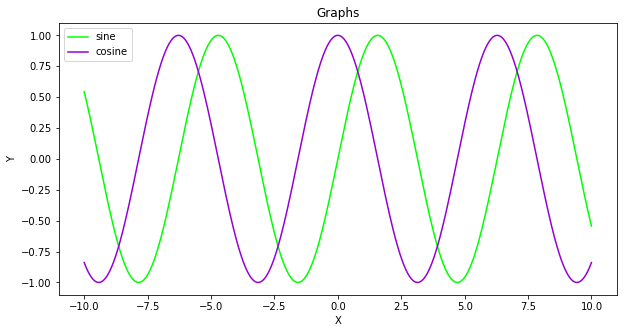

In [0]:
X1 = np.sin(np.linspace(-10, 10, 2001))
X2 = np.cos(np.linspace(-10, 10, 2001))

plt.figure(figsize=(10, 5))
plt.title('Graphs')
plt.plot(np.linspace(-10, 10, 2001), X1, color='lime', label='sine')
plt.plot(np.linspace(-10, 10, 2001), X2, color='darkviolet', label='cosine')

plt.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

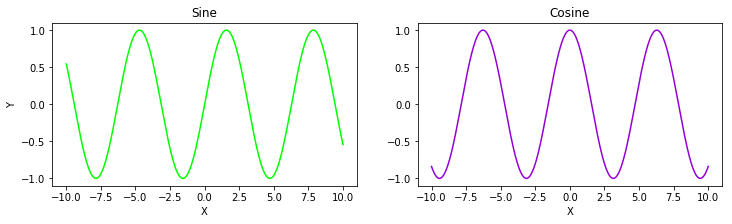

In [0]:
plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.title('Sine')
plt.plot(np.linspace(-10, 10, 2001), X1, color='lime')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(122)
plt.title('Cosine')
plt.plot(np.linspace(-10, 10, 2001), X2, color='darkviolet')
plt.xlabel('X')

plt.show()

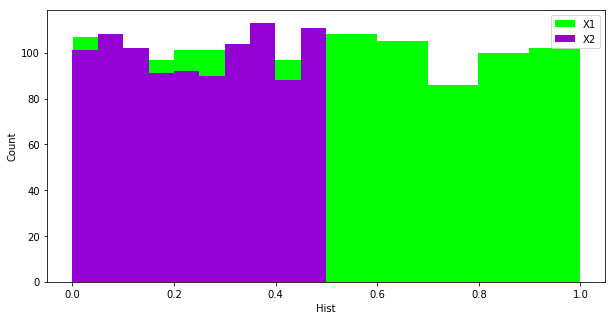

In [0]:
X1 = np.random.rand(1000)
X2 = np.random.rand(1000) * 0.5

plt.figure(figsize=(10, 5))
for X, label, color in zip([X1, X2], ['X1', 'X2'], ['lime', 'darkviolet']):
    plt.hist(X, bins=10, color=color, label=label)
plt.xlabel('Hist')
plt.ylabel('Count')
plt.legend()
plt.show()

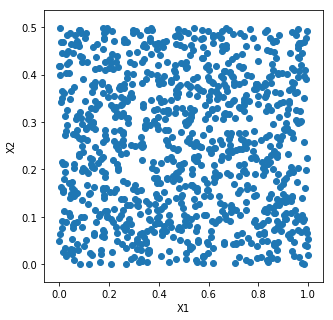

In [0]:
plt.figure(figsize=(5, 5))
plt.scatter(X1, X2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()